In [1]:
!pip uninstall numpy
# !pip install numpy==1.22.0  # Replace 1.22.0 with the version you want to install
# !pip install --upgrade scipy


^C


**Signature Database 800**

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import train_test_split

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
sdf = pd.read_csv("wildfire.csv")
sdf

,OBJECTID,WildfireY/N,landforms,Slope,NDVI,EVI,Precipitat,Elevation,LST,SAT
0,1,0,1,0.943340,0.727643,0.480379,65.556503,1232,296.270996,50
1,2,0,1,0.141800,0.422116,0.330362,63.819801,1296,304.858002,50
2,3,0,0,7.857390,0.724060,0.502521,63.819801,1500,295.014008,50
3,4,0,4,7.946320,0.617267,0.456614,92.060898,1824,292.343994,50
4,5,0,1,1.747330,0.506889,0.318624,57.760101,1333,302.588989,50
...,...,...,...,...,...,...,...,...,...,...
965,966,1,1,0.163318,0.669637,0.538933,32.051300,17,303.433014,68
966,967,1,1,0.146076,0.691545,0.552430,32.051300,10,302.074005,68
967,968,1,1,0.158213,0.581261,0.431571,33.258999,31,306.803986,68
968,969,1,1,3.095460,0.597443,0.470788,60.921200,46,305.402008,59


In [4]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
import numpy as np

# Create a random dataset with 12 factors
np.random.seed(5)
data = {
    'landforms': np.random.rand(100),
    'Slope': np.random.rand(100),
    'NDVI': np.random.rand(100),
    'EVI': np.random.rand(100),
    'LST': np.random.rand(100),
    'SAT': np.random.rand(100),
    'Precipitat': np.random.rand(100),
    'Elevation': np.random.rand(100),
    
}

sdf = pd.DataFrame(data)
sdf

In [6]:
correlation_matrix = sdf.corr()


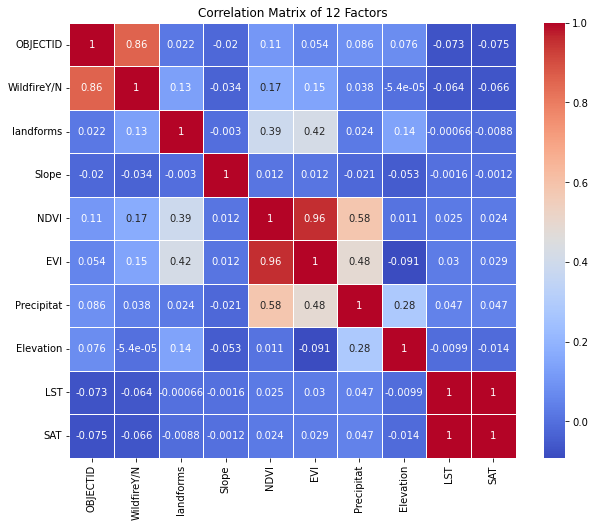

In [7]:
# Set the figure size (optional)
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add a title
plt.title('Correlation Matrix of 12 Factors')

# Show the plot
plt.show()


In [8]:
# Normalize the correlation matrix
normalized_corr_matrix = (correlation_matrix - correlation_matrix.min().min()) / (correlation_matrix.max().max() - correlation_matrix.min().min())


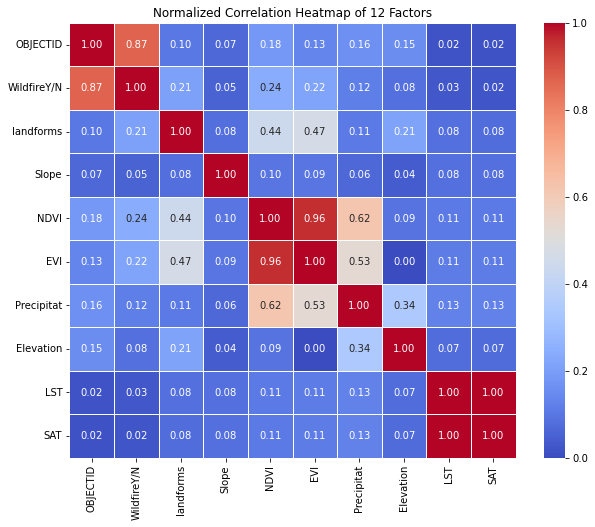

In [9]:
# Set the figure size (optional)
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(normalized_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title
plt.title('Normalized Correlation Heatmap of 12 Factors')

# Show the plot
plt.show()


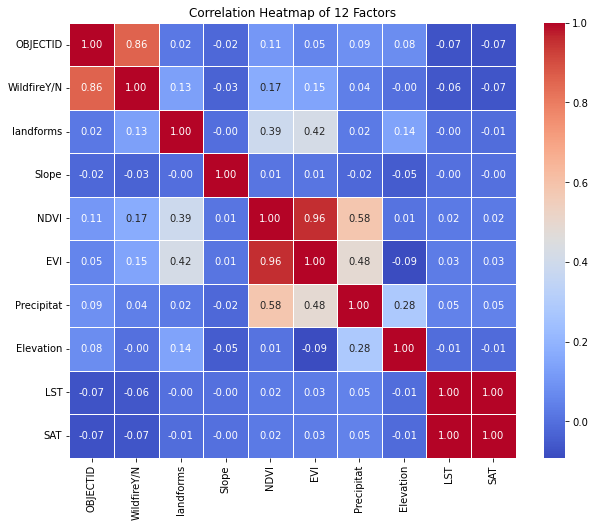

In [10]:
# Set the figure size (optional)
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap of 12 Factors')

# Show the plot
plt.show()


In [11]:
dff = sdf.fillna(method='ffill')
dff

,OBJECTID,WildfireY/N,landforms,Slope,NDVI,EVI,Precipitat,Elevation,LST,SAT
0,1,0,1,0.943340,0.727643,0.480379,65.556503,1232,296.270996,50
1,2,0,1,0.141800,0.422116,0.330362,63.819801,1296,304.858002,50
2,3,0,0,7.857390,0.724060,0.502521,63.819801,1500,295.014008,50
3,4,0,4,7.946320,0.617267,0.456614,92.060898,1824,292.343994,50
4,5,0,1,1.747330,0.506889,0.318624,57.760101,1333,302.588989,50
...,...,...,...,...,...,...,...,...,...,...
965,966,1,1,0.163318,0.669637,0.538933,32.051300,17,303.433014,68
966,967,1,1,0.146076,0.691545,0.552430,32.051300,10,302.074005,68
967,968,1,1,0.158213,0.581261,0.431571,33.258999,31,306.803986,68
968,969,1,1,3.095460,0.597443,0.470788,60.921200,46,305.402008,59


In [12]:
# Define the path to save the CSV file in your Google Drive
output_path = '800_Final.csv'

# Export the DataFrame to a CSV file in your Google Drive
dff.to_csv(output_path, index=False)

In [13]:
X = sdf[['landforms','Slope','NDVI','EVI', 'Precipitat','Elevation', 'LST', 'SAT']]
Y = sdf['WildfireY/N']

In [14]:
train_X, test_X, train_Y, test_Y = train_test_split(
    X, Y, train_size=0.7, random_state=5)

In [ ]:
train_Y

In [ ]:
test_Y

In [ ]:
train_X

In [ ]:
test_X

**Full Database**

In [ ]:
from google.colab import files
files.upload()

In [15]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the DataFrame from the file
full_X = pd.read_csv("full.csv")

# Create an imputer with strategy 'mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your data
imputer.fit(full_X)

# Transform the data to fill missing values
full_X_imputed = imputer.transform(full_X)

# Convert back to DataFrame (optional)
full_X_imputed_df = pd.DataFrame(full_X_imputed, columns=full_X.columns)

# Now, full_X_imputed_df contains the DataFrame with missing values imputed

df = full_X_imputed_df.rename(columns={'Precipitation': 'Precipitat'})
df

,OBJECTID,pointid,grid_code,landforms,Slope,NDVI,EVI,Precipitat,Elevation,LST,SAT
0,1.0,1652211.0,261.200012,1.867517,5.083779,0.000000,0.000000,21.112551,0.000000,261.200012,68.0
1,2.0,1652212.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0
2,3.0,1652213.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0
3,4.0,1652214.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0
4,5.0,1652215.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0
...,...,...,...,...,...,...,...,...,...,...,...
1696531,1696532.0,328.0,295.502411,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,295.502411,127.0
1696532,1696533.0,329.0,296.384247,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,296.384247,127.0
1696533,1696534.0,330.0,296.384247,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,296.384247,127.0
1696534,1696535.0,331.0,297.633392,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,297.633392,127.0


In [16]:
full_X = df[['landforms','Slope','NDVI','EVI', 'Precipitat','Elevation', 'LST', 'SAT']]
full_Y = sdf['WildfireY/N']

In [17]:
train_X, test_X, train_Y, test_Y = train_test_split(
    X, Y, train_size=0.7, random_state=5)

**Data Equal Seperation**

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split



# Assuming you have your data in X and Y dataframes

# Calculate the number of samples with 0 and 1 in the dependent variable
num_samples_0 = len(Y[Y == 0])
num_samples_1 = len(Y[Y == 1])

# Calculate the minimum number of samples to use for both classes
min_samples = min(num_samples_0, num_samples_1)

# Choose the number of samples you want for the test set (e.g., 5000)
num_samples_test = 240

# Ensure you don't exceed the minimum number of samples available for either class
num_samples_test = min(num_samples_test, min_samples)

# Create a mask for selecting samples with 0 and 1 in the dependent variable
mask_0 = Y == 0
mask_1 = Y == 1

# Sample an equal number of samples from both classes for the test set
test_indices_0 = np.random.choice(np.where(mask_0)[0], num_samples_test // 2, replace=False)
test_indices_1 = np.random.choice(np.where(mask_1)[0], num_samples_test // 2, replace=False)

# Concatenate the indices for the test set
test_indices = np.concatenate([test_indices_0, test_indices_1])

# Create train and test dataframes
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=num_samples_test, stratify=Y, random_state=5)

# Filter the test data based on the selected indices
test_X = X.iloc[test_indices]
test_Y = Y.iloc[test_indices]


In [ ]:
test_X

**Random Forest Model**

In [ ]:
train_X

In [19]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Generate some sample data
np.random.seed(5)

# Create a Random Forest Regressor model
n_estimators = 100  # Number of trees in the forest
max_depth = None    # Maximum depth of the trees, None means unlimited depth
random_forest = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=5)

# Train the model
random_forest.fit(train_X, train_Y)

# Make predictions on the test set
y_pred = random_forest.predict(test_X)

# Evaluate the model
mse = mean_squared_error(test_Y, y_pred)
r2 = r2_score(test_Y, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

sdf["predictedRF"] = random_forest.predict(X)
sdf


Mean Squared Error: 0.041460000000000004
R-squared: 0.83416


,OBJECTID,WildfireY/N,landforms,Slope,NDVI,EVI,Precipitat,Elevation,LST,SAT,predictedRF
0,1,0,1,0.943340,0.727643,0.480379,65.556503,1232,296.270996,50,0.10
1,2,0,1,0.141800,0.422116,0.330362,63.819801,1296,304.858002,50,0.10
2,3,0,0,7.857390,0.724060,0.502521,63.819801,1500,295.014008,50,0.16
3,4,0,4,7.946320,0.617267,0.456614,92.060898,1824,292.343994,50,0.06
4,5,0,1,1.747330,0.506889,0.318624,57.760101,1333,302.588989,50,0.13
...,...,...,...,...,...,...,...,...,...,...,...
965,966,1,1,0.163318,0.669637,0.538933,32.051300,17,303.433014,68,0.78
966,967,1,1,0.146076,0.691545,0.552430,32.051300,10,302.074005,68,0.89
967,968,1,1,0.158213,0.581261,0.431571,33.258999,31,306.803986,68,0.16
968,969,1,1,3.095460,0.597443,0.470788,60.921200,46,305.402008,59,0.73


LST: 0.21221467485994863
Slope: 0.21218455661297392
NDVI: 0.14809433967712812
Elevation: 0.14440540324379206
EVI: 0.13776409615987503
Precipitat: 0.11204929449977183
landforms: 0.022687427408736013
SAT: 0.01060020753777453


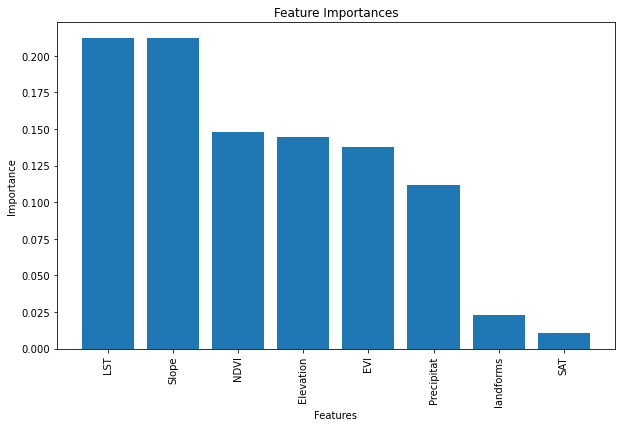

In [20]:
import matplotlib.pyplot as plt
# Get feature importances from the trained model
feature_importances = random_forest.feature_importances_

# Get the corresponding feature names or column names if you have them
feature_names = X.columns  # Replace with your feature names if available

# Sort the feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Print feature importances and feature names
for i in sorted_idx:
    print(f"{feature_names[i]}: {feature_importances[i]}")

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[sorted_idx], align="center")
plt.xticks(range(X.shape[1]), np.array(feature_names)[sorted_idx], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


In [21]:
full_X = df[['landforms','Slope','NDVI','EVI', 'Precipitat','Elevation', 'LST', 'SAT']]
full_Y = sdf['WildfireY/N']

In [22]:
full_X = df[['landforms','Slope','NDVI','EVI', 'Precipitat','Elevation', 'LST', 'SAT']]
df["PredictedRF"] = random_forest.predict(full_X)
df

,OBJECTID,pointid,grid_code,landforms,Slope,NDVI,EVI,Precipitat,Elevation,LST,SAT,PredictedRF
0,1.0,1652211.0,261.200012,1.867517,5.083779,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.08
1,2.0,1652212.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.01
2,3.0,1652213.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.01
3,4.0,1652214.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.01
4,5.0,1652215.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...
1696531,1696532.0,328.0,295.502411,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,295.502411,127.0,0.41
1696532,1696533.0,329.0,296.384247,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,296.384247,127.0,0.40
1696533,1696534.0,330.0,296.384247,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,296.384247,127.0,0.40
1696534,1696535.0,331.0,297.633392,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,297.633392,127.0,0.58


**Decision Tree**

In [23]:
X = sdf[['landforms','Slope','NDVI','EVI', 'Precipitat','Elevation', 'LST', 'SAT']]
Y = sdf['WildfireY/N']

In [24]:
train_X, test_X, train_Y, test_Y = train_test_split(
    X, Y, train_size=0.7, random_state=5)

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split



# Assuming you have your data in X and Y dataframes

# Calculate the number of samples with 0 and 1 in the dependent variable
num_samples_0 = len(Y[Y == 0])
num_samples_1 = len(Y[Y == 1])

# Calculate the minimum number of samples to use for both classes
min_samples = min(num_samples_0, num_samples_1)

# Choose the number of samples you want for the test set (e.g., 5000)
num_samples_test = 240

# Ensure you don't exceed the minimum number of samples available for either class
num_samples_test = min(num_samples_test, min_samples)

# Create a mask for selecting samples with 0 and 1 in the dependent variable
mask_0 = Y == 0
mask_1 = Y == 1

# Sample an equal number of samples from both classes for the test set
test_indices_0 = np.random.choice(np.where(mask_0)[0], num_samples_test // 2, replace=False)
test_indices_1 = np.random.choice(np.where(mask_1)[0], num_samples_test // 2, replace=False)

# Concatenate the indices for the test set
test_indices = np.concatenate([test_indices_0, test_indices_1])

# Create train and test dataframes
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=num_samples_test, stratify=Y, random_state=5)

# Filter the test data based on the selected indices
test_X = X.iloc[test_indices]
test_Y = Y.iloc[test_indices]

In [26]:
full_X = df[['landforms','Slope','NDVI','EVI', 'Precipitat','Elevation', 'LST', 'SAT']]

# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Generate some sample data
np.random.seed(5)

# Create a Decision Tree Regressor model
max_depth = 5  # Maximum depth of the tree
decision_tree = DecisionTreeRegressor(max_depth=max_depth)

# Train the model
decision_tree.fit(train_X, train_Y)

# Make predictions on the test set
y_pred = decision_tree.predict(test_X)

# Evaluate the model
mse = mean_squared_error(test_Y, y_pred)
r2 = r2_score(test_Y, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

sdf["predictedDT"] = decision_tree.predict(X)
sdf


Mean Squared Error: 0.11194466448031676
R-squared: 0.552221342078733


,OBJECTID,WildfireY/N,landforms,Slope,NDVI,EVI,Precipitat,Elevation,LST,SAT,predictedRF,predictedDT
0,1,0,1,0.943340,0.727643,0.480379,65.556503,1232,296.270996,50,0.10,0.232000
1,2,0,1,0.141800,0.422116,0.330362,63.819801,1296,304.858002,50,0.10,0.000000
2,3,0,0,7.857390,0.724060,0.502521,63.819801,1500,295.014008,50,0.16,0.232000
3,4,0,4,7.946320,0.617267,0.456614,92.060898,1824,292.343994,50,0.06,0.232000
4,5,0,1,1.747330,0.506889,0.318624,57.760101,1333,302.588989,50,0.13,0.538462
...,...,...,...,...,...,...,...,...,...,...,...,...
965,966,1,1,0.163318,0.669637,0.538933,32.051300,17,303.433014,68,0.78,0.666667
966,967,1,1,0.146076,0.691545,0.552430,32.051300,10,302.074005,68,0.89,0.666667
967,968,1,1,0.158213,0.581261,0.431571,33.258999,31,306.803986,68,0.16,0.666667
968,969,1,1,3.095460,0.597443,0.470788,60.921200,46,305.402008,59,0.73,0.090909


Slope: 0.2943358384407416
EVI: 0.270790639346872
LST: 0.2517080329986108
Elevation: 0.06752365213529866
NDVI: 0.06701498092539443
Precipitat: 0.04862685615308256
SAT: 0.0
landforms: 0.0


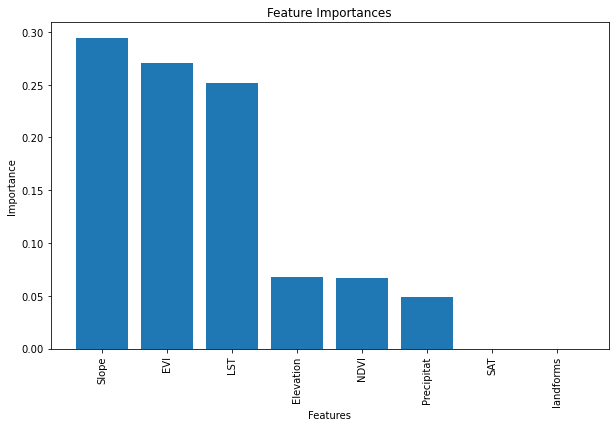

In [27]:
import matplotlib.pyplot as plt
# Get feature importances from the trained model
feature_importances = decision_tree.feature_importances_

# Get the corresponding feature names or column names if you have them
feature_names = X.columns  # Replace with your feature names if available

# Sort the feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Print feature importances and feature names
for i in sorted_idx:
    print(f"{feature_names[i]}: {feature_importances[i]}")

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[sorted_idx], align="center")
plt.xticks(range(X.shape[1]), np.array(feature_names)[sorted_idx], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [ ]:
full_X

In [28]:
df["PredictedDT"] = decision_tree.predict(full_X)
df

,OBJECTID,pointid,grid_code,landforms,Slope,NDVI,EVI,Precipitat,Elevation,LST,SAT,PredictedRF,PredictedDT
0,1.0,1652211.0,261.200012,1.867517,5.083779,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.08,0.000
1,2.0,1652212.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.01,0.000
2,3.0,1652213.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.01,0.000
3,4.0,1652214.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.01,0.000
4,5.0,1652215.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.01,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696531,1696532.0,328.0,295.502411,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,295.502411,127.0,0.41,0.232
1696532,1696533.0,329.0,296.384247,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,296.384247,127.0,0.40,0.232
1696533,1696534.0,330.0,296.384247,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,296.384247,127.0,0.40,0.232
1696534,1696535.0,331.0,297.633392,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,297.633392,127.0,0.58,0.232


**KNN**

In [29]:
X = sdf[['landforms','Slope','NDVI','EVI', 'Precipitat','Elevation', 'LST', 'SAT']]
Y = sdf['WildfireY/N']

In [30]:
train_X, test_X, train_Y, test_Y = train_test_split(
    X, Y, train_size=0.7, random_state=5)

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


# Assuming you have your data in X and Y dataframes

# Calculate the number of samples with 0 and 1 in the dependent variable
num_samples_0 = len(Y[Y == 0])
num_samples_1 = len(Y[Y == 1])

# Calculate the minimum number of samples to use for both classes
min_samples = min(num_samples_0, num_samples_1)

# Choose the number of samples you want for the test set (e.g., 5000)
num_samples_test = 240

# Ensure you don't exceed the minimum number of samples available for either class
num_samples_test = min(num_samples_test, min_samples)

# Create a mask for selecting samples with 0 and 1 in the dependent variable
mask_0 = Y == 0
mask_1 = Y == 1

# Sample an equal number of samples from both classes for the test set
test_indices_0 = np.random.choice(np.where(mask_0)[0], num_samples_test // 2, replace=False)
test_indices_1 = np.random.choice(np.where(mask_1)[0], num_samples_test // 2, replace=False)

# Concatenate the indices for the test set
test_indices = np.concatenate([test_indices_0, test_indices_1])

# Create train and test dataframes
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=num_samples_test, stratify=Y, random_state=5)

# Filter the test data based on the selected indices
test_X = X.iloc[test_indices]
test_Y = Y.iloc[test_indices]

In [32]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
#full_X = df[['DEM','NDVI','Slope','TWI', 'TRI','Aspect', 'Soil_Texture_Final', 'Curvature' ,'Drainage_Density', 'River_ED', 'Annual_Rainfall', 'Geology_Final']]
# Generate some sample data
np.random.seed(5)

# Create a K Nearest Neighbors Regressor model
n_neighbors = 5  # Number of neighbors to consider
knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors)

# Train the model
knn_regressor.fit(train_X, train_Y)

# Make predictions on the test set
y_pred = knn_regressor.predict(test_X)

# Evaluate the model
mse = mean_squared_error(test_Y, y_pred)
r2 = r2_score(test_Y, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

sdf["predictedDT"] = knn_regressor.predict(X)
sdf


Mean Squared Error: 0.1316666666666667
R-squared: 0.47333333333333316


,OBJECTID,WildfireY/N,landforms,Slope,NDVI,EVI,Precipitat,Elevation,LST,SAT,predictedRF,predictedDT
0,1,0,1,0.943340,0.727643,0.480379,65.556503,1232,296.270996,50,0.10,0.6
1,2,0,1,0.141800,0.422116,0.330362,63.819801,1296,304.858002,50,0.10,0.2
2,3,0,0,7.857390,0.724060,0.502521,63.819801,1500,295.014008,50,0.16,0.4
3,4,0,4,7.946320,0.617267,0.456614,92.060898,1824,292.343994,50,0.06,0.2
4,5,0,1,1.747330,0.506889,0.318624,57.760101,1333,302.588989,50,0.13,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
965,966,1,1,0.163318,0.669637,0.538933,32.051300,17,303.433014,68,0.78,0.4
966,967,1,1,0.146076,0.691545,0.552430,32.051300,10,302.074005,68,0.89,0.6
967,968,1,1,0.158213,0.581261,0.431571,33.258999,31,306.803986,68,0.16,0.0
968,969,1,1,3.095460,0.597443,0.470788,60.921200,46,305.402008,59,0.73,0.2


In [33]:
import matplotlib.pyplot as plt
# Get feature importances from the trained model
feature_importances = knn_regressor.feature_importances_

# Get the corresponding feature names or column names if you have them
feature_names = X.columns  # Replace with your feature names if available

# Sort the feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Print feature importances and feature names
for i in sorted_idx:
    print(f"{feature_names[i]}: {feature_importances[i]}")

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[sorted_idx], align="center")
plt.xticks(range(X.shape[1]), np.array(feature_names)[sorted_idx], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

AttributeError: 'KNeighborsRegressor' object has no attribute 'feature_importances_'

In [34]:
df["PredictedKNN"] = knn_regressor.predict(full_X)
df

,OBJECTID,pointid,grid_code,landforms,Slope,NDVI,EVI,Precipitat,Elevation,LST,SAT,PredictedRF,PredictedDT,PredictedKNN
0,1.0,1652211.0,261.200012,1.867517,5.083779,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.08,0.000,0.2
1,2.0,1652212.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.01,0.000,0.2
2,3.0,1652213.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.01,0.000,0.2
3,4.0,1652214.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.01,0.000,0.2
4,5.0,1652215.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.01,0.000,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696531,1696532.0,328.0,295.502411,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,295.502411,127.0,0.41,0.232,0.4
1696532,1696533.0,329.0,296.384247,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,296.384247,127.0,0.40,0.232,0.4
1696533,1696534.0,330.0,296.384247,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,296.384247,127.0,0.40,0.232,0.4
1696534,1696535.0,331.0,297.633392,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,297.633392,127.0,0.58,0.232,0.4


**XGBoost**

In [35]:
X = sdf[['landforms','Slope','NDVI','EVI', 'Precipitat','Elevation', 'LST', 'SAT']]
Y = sdf['WildfireY/N']

In [36]:
train_X, test_X, train_Y, test_Y = train_test_split(
    X, Y, train_size=0.7, random_state=5)

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


# Assuming you have your data in X and Y dataframes

# Calculate the number of samples with 0 and 1 in the dependent variable
num_samples_0 = len(Y[Y == 0])
num_samples_1 = len(Y[Y == 1])

# Calculate the minimum number of samples to use for both classes
min_samples = min(num_samples_0, num_samples_1)

# Choose the number of samples you want for the test set (e.g., 5000)
num_samples_test = 240

# Ensure you don't exceed the minimum number of samples available for either class
num_samples_test = min(num_samples_test, min_samples)

# Create a mask for selecting samples with 0 and 1 in the dependent variable
mask_0 = Y == 0
mask_1 = Y == 1

# Sample an equal number of samples from both classes for the test set
test_indices_0 = np.random.choice(np.where(mask_0)[0], num_samples_test // 2, replace=False)
test_indices_1 = np.random.choice(np.where(mask_1)[0], num_samples_test // 2, replace=False)

# Concatenate the indices for the test set
test_indices = np.concatenate([test_indices_0, test_indices_1])

# Create train and test dataframes
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=num_samples_test, stratify=Y, random_state=5)

# Filter the test data based on the selected indices
test_X = X.iloc[test_indices]
test_Y = Y.iloc[test_indices]

In [38]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\USER\\AppData\\Roaming\\Python\\Python39\\site-packages\\~umpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Check the permissions.



In [42]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

#full_X = df[['DEM','NDVI','Slope','TWI', 'TRI','Aspect', 'Soil_Texture_Final', 'Curvature' ,'Drainage_Density', 'River_ED', 'Annual_Rainfall', 'Geology_Final']]
# Generate some sample data
np.random.seed(5)

# Create an XGBoost Regressor model
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=5)

# Train the model
xgb_regressor.fit(train_X, train_Y)

# Make predictions on the test set
y_pred = xgb_regressor.predict(test_X)

# Evaluate the model
mse = mean_squared_error(test_Y, y_pred)
r2 = r2_score(test_Y, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

sdf["predictedXG"] = xgb_regressor.predict(X)
sdf


Mean Squared Error: 0.00012420534821896008
R-squared: 0.9995031786071241


,OBJECTID,WildfireY/N,landforms,Slope,NDVI,EVI,Precipitat,Elevation,LST,SAT,predictedRF,predictedDT,predictedXG
0,1,0,1,0.943340,0.727643,0.480379,65.556503,1232,296.270996,50,0.10,0.6,0.011162
1,2,0,1,0.141800,0.422116,0.330362,63.819801,1296,304.858002,50,0.10,0.2,0.003466
2,3,0,0,7.857390,0.724060,0.502521,63.819801,1500,295.014008,50,0.16,0.4,0.006294
3,4,0,4,7.946320,0.617267,0.456614,92.060898,1824,292.343994,50,0.06,0.2,-0.005830
4,5,0,1,1.747330,0.506889,0.318624,57.760101,1333,302.588989,50,0.13,0.2,0.021852
...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,966,1,1,0.163318,0.669637,0.538933,32.051300,17,303.433014,68,0.78,0.4,0.992639
966,967,1,1,0.146076,0.691545,0.552430,32.051300,10,302.074005,68,0.89,0.6,1.003680
967,968,1,1,0.158213,0.581261,0.431571,33.258999,31,306.803986,68,0.16,0.0,0.257245
968,969,1,1,3.095460,0.597443,0.470788,60.921200,46,305.402008,59,0.73,0.2,0.548124


In [61]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have your data in X and Y dataframes
# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.7, random_state=5)

# Create a Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=5)

# Train the model
rf_regressor.fit(train_X, train_Y)

# Make predictions on the test set
y_pred = rf_regressor.predict(test_X)

# Evaluate the model
mse = mean_squared_error(test_Y, y_pred)
r2 = r2_score(test_Y, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.12406701030927834
R-squared: 0.4980354276158625


In [62]:
df["predictionsRandomForest"] = rf_regressor.predict(full_X)
df

,OBJECTID,pointid,grid_code,landforms,Slope,NDVI,EVI,Precipitat,Elevation,LST,SAT,PredictedRF,PredictedDT,PredictedKNN,predictionsXGP,XGBoost,predictionsRandomForest
0,1.0,1652211.0,261.200012,1.867517,5.083779,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.08,0.000,0.2,0.039666,0.274818,0.25
1,2.0,1652212.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.01,0.000,0.2,-0.013100,0.249241,0.03
2,3.0,1652213.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.01,0.000,0.2,-0.013100,0.249241,0.03
3,4.0,1652214.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.01,0.000,0.2,-0.013100,0.249241,0.03
4,5.0,1652215.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.01,0.000,0.2,-0.013100,0.249241,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696531,1696532.0,328.0,295.502411,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,295.502411,127.0,0.41,0.232,0.4,0.252157,0.377822,0.51
1696532,1696533.0,329.0,296.384247,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,296.384247,127.0,0.40,0.232,0.4,0.243068,0.373416,0.41
1696533,1696534.0,330.0,296.384247,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,296.384247,127.0,0.40,0.232,0.4,0.243068,0.373416,0.41
1696534,1696535.0,331.0,297.633392,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,297.633392,127.0,0.58,0.232,0.4,0.470340,0.483584,0.58


In [64]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.16.1 requires numpy<2.0.0,>=1.23.5; python_version <= "3.11", but you have numpy 1.22.4 which is incompatible.


In [65]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have your data in X and Y dataframes
# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.7, random_state=5)

# Create a LightGBM regressor model
lgb_regressor = lgb.LGBMRegressor(random_state=5)

# Train the model
lgb_regressor.fit(train_X, train_Y)

# Make predictions on the test set
y_pred = lgb_regressor.predict(test_X)

# Evaluate the model
mse = mean_squared_error(test_Y, y_pred)
r2 = r2_score(test_Y, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
df["predictionsLightGBM"] = lgb_regressor.predict(full_X)
df


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1344
[LightGBM] [Info] Number of data points in the train set: 679, number of used features: 8
[LightGBM] [Info] Start training from score 0.412371
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

,OBJECTID,pointid,grid_code,landforms,Slope,NDVI,EVI,Precipitat,Elevation,LST,SAT,PredictedRF,PredictedDT,PredictedKNN,predictionsXGP,XGBoost,predictionsRandomForest,predictionsLightGBM
0,1.0,1652211.0,261.200012,1.867517,5.083779,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.08,0.000,0.2,0.039666,0.274818,0.25,0.216514
1,2.0,1652212.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.01,0.000,0.2,-0.013100,0.249241,0.03,0.007708
2,3.0,1652213.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.01,0.000,0.2,-0.013100,0.249241,0.03,0.007708
3,4.0,1652214.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.01,0.000,0.2,-0.013100,0.249241,0.03,0.007708
4,5.0,1652215.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.01,0.000,0.2,-0.013100,0.249241,0.03,0.007708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696531,1696532.0,328.0,295.502411,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,295.502411,127.0,0.41,0.232,0.4,0.252157,0.377822,0.51,0.487057
1696532,1696533.0,329.0,296.384247,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,296.384247,127.0,0.40,0.232,0.4,0.243068,0.373416,0.41,0.381227
1696533,1696534.0,330.0,296.384247,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,296.384247,127.0,0.40,0.232,0.4,0.243068,0.373416,0.41,0.381227
1696534,1696535.0,331.0,297.633392,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,297.633392,127.0,0.58,0.232,0.4,0.470340,0.483584,0.58,0.465530


In [43]:
df["predictionsXGP"] = xgb_regressor.predict(full_X)
df

,OBJECTID,pointid,grid_code,landforms,Slope,NDVI,EVI,Precipitat,Elevation,LST,SAT,PredictedRF,PredictedDT,PredictedKNN,predictionsXGP
0,1.0,1652211.0,261.200012,1.867517,5.083779,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.08,0.000,0.2,0.039666
1,2.0,1652212.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.01,0.000,0.2,-0.013100
2,3.0,1652213.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.01,0.000,0.2,-0.013100
3,4.0,1652214.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.01,0.000,0.2,-0.013100
4,5.0,1652215.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.01,0.000,0.2,-0.013100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696531,1696532.0,328.0,295.502411,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,295.502411,127.0,0.41,0.232,0.4,0.252157
1696532,1696533.0,329.0,296.384247,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,296.384247,127.0,0.40,0.232,0.4,0.243068
1696533,1696534.0,330.0,296.384247,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,296.384247,127.0,0.40,0.232,0.4,0.243068
1696534,1696535.0,331.0,297.633392,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,297.633392,127.0,0.58,0.232,0.4,0.470340


In [44]:
df["XGBoost"]=((df.predictionsXGP-df.predictionsXGP.min())/(df.predictionsXGP.max()-df.predictionsXGP.min()))
df

,OBJECTID,pointid,grid_code,landforms,Slope,NDVI,EVI,Precipitat,Elevation,LST,SAT,PredictedRF,PredictedDT,PredictedKNN,predictionsXGP,XGBoost
0,1.0,1652211.0,261.200012,1.867517,5.083779,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.08,0.000,0.2,0.039666,0.274818
1,2.0,1652212.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.01,0.000,0.2,-0.013100,0.249241
2,3.0,1652213.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.01,0.000,0.2,-0.013100,0.249241
3,4.0,1652214.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.01,0.000,0.2,-0.013100,0.249241
4,5.0,1652215.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.01,0.000,0.2,-0.013100,0.249241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696531,1696532.0,328.0,295.502411,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,295.502411,127.0,0.41,0.232,0.4,0.252157,0.377822
1696532,1696533.0,329.0,296.384247,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,296.384247,127.0,0.40,0.232,0.4,0.243068,0.373416
1696533,1696534.0,330.0,296.384247,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,296.384247,127.0,0.40,0.232,0.4,0.243068,0.373416
1696534,1696535.0,331.0,297.633392,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,297.633392,127.0,0.58,0.232,0.4,0.470340,0.483584


In [66]:
!pip install tpot
!pip install catboost


Defaulting to user installation because normal site-packages is not writeable
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=93df207edb9e16a2a74c7076bb0e56c9ff208b8f5de6fabd4dec954096a4ca6b
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\48\8c\93\3afb1916772591fe6bcc25cdf8b1c5bdc362f0ec8e2f0fd413
Successfully built stopit
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.3
    Uninstalling scikit-learn-1.1.3:
      Successfully uninstalled scikit-learn-1.1.3


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\USER\\AppData\\Roaming\\Python\\Python39\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Check the permissions.



Defaulting to user installation because normal site-packages is not writeable


In [67]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have your data in X and Y dataframes
# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.7, random_state=5)

# Create a CatBoost regressor model
catboost_regressor = CatBoostRegressor(iterations=1000, learning_rate=0.1, random_state=5)

# Train the model
catboost_regressor.fit(train_X, train_Y, verbose=100)

# Make predictions on the test set
y_pred = catboost_regressor.predict(test_X)

# Evaluate the model
mse = mean_squared_error(test_Y, y_pred)
r2 = r2_score(test_Y, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Make predictions on the full dataset
df["predictionsCatBoost"] = catboost_regressor.predict(full_X)
df


0:	learn: 0.4771321	total: 152ms	remaining: 2m 32s
100:	learn: 0.2498985	total: 311ms	remaining: 2.77s
200:	learn: 0.1718093	total: 465ms	remaining: 1.85s
300:	learn: 0.1258490	total: 615ms	remaining: 1.43s
400:	learn: 0.0973778	total: 770ms	remaining: 1.15s
500:	learn: 0.0751047	total: 921ms	remaining: 917ms
600:	learn: 0.0587406	total: 1.07s	remaining: 714ms
700:	learn: 0.0477522	total: 1.23s	remaining: 524ms
800:	learn: 0.0388409	total: 1.38s	remaining: 344ms
900:	learn: 0.0317685	total: 1.53s	remaining: 169ms
999:	learn: 0.0263466	total: 1.69s	remaining: 0us
Mean Squared Error: 0.12375296682898784
R-squared: 0.49930602082916775


,OBJECTID,pointid,grid_code,landforms,Slope,NDVI,EVI,Precipitat,Elevation,LST,SAT,PredictedRF,PredictedDT,PredictedKNN,predictionsXGP,XGBoost,predictionsRandomForest,predictionsLightGBM,predictionsCatBoost
0,1.0,1652211.0,261.200012,1.867517,5.083779,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.08,0.000,0.2,0.039666,0.274818,0.25,0.216514,0.575999
1,2.0,1652212.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.01,0.000,0.2,-0.013100,0.249241,0.03,0.007708,0.117392
2,3.0,1652213.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.01,0.000,0.2,-0.013100,0.249241,0.03,0.007708,0.117392
3,4.0,1652214.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.01,0.000,0.2,-0.013100,0.249241,0.03,0.007708,0.117392
4,5.0,1652215.0,261.200012,1.867517,0.000000,0.000000,0.000000,21.112551,0.000000,261.200012,68.0,0.01,0.000,0.2,-0.013100,0.249241,0.03,0.007708,0.117392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696531,1696532.0,328.0,295.502411,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,295.502411,127.0,0.41,0.232,0.4,0.252157,0.377822,0.51,0.487057,0.658492
1696532,1696533.0,329.0,296.384247,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,296.384247,127.0,0.40,0.232,0.4,0.243068,0.373416,0.41,0.381227,0.655491
1696533,1696534.0,330.0,296.384247,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,296.384247,127.0,0.40,0.232,0.4,0.243068,0.373416,0.41,0.381227,0.655491
1696534,1696535.0,331.0,297.633392,1.867517,5.083779,0.495153,0.355088,41.679019,827.216832,297.633392,127.0,0.58,0.232,0.4,0.470340,0.483584,0.58,0.465530,0.661114


In [71]:
!pip install tpot --upgrade


Defaulting to user installation because normal site-packages is not writeable


In [73]:
!pip install scikit-learn==0.24.2


Defaulting to user installation because normal site-packages is not writeable

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tpot 0.12.2 requires scikit-learn>=1.4.1, but you have scikit-learn 0.24.2 which is incompatible.



  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.2
    Uninstalling scikit-learn-1.4.2:
      Successfully uninstalled scikit-learn-1.4.2


In [74]:
!pip install tpot --upgrade
!pip install tpot==0.11.7


Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.4.2-cp39-cp39-win_amd64.whl (10.6 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
Defaulting to user installation because normal site-packages is not writeable
  Attempting uninstall: tpot
    Found existing installation: TPOT 0.12.2
    Uninstalling TPOT-0.12.2:
      Successfully uninstalled TPOT-0.12.2


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [78]:
import h2o
from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the H2O cluster
h2o.init()

# Assuming you have your data in X and Y dataframes
# Combine X and Y into a single DataFrame
df = X.copy()
df['target'] = Y

# Convert the DataFrame to an H2OFrame
h2o_df = h2o.H2OFrame(df)

# Split the data into training and testing sets
train_h2o, test_h2o = h2o_df.split_frame(ratios=[0.7], seed=5)

# Define the predictor and response columns
x = train_h2o.columns[:-1]
y = 'target'

# Initialize the AutoML model
aml = H2OAutoML(max_runtime_secs=600)  # Set a time limit for AutoML run

# Train the AutoML model
aml.train(x=x, y=y, training_frame=train_h2o)

# Get the best model from AutoML
best_model = aml.leader

# Make predictions on the test set
y_pred = best_model.predict(test_h2o).as_data_frame()['predict'].values

# Evaluate the model
mse = mean_squared_error(test_Y, y_pred)
r2 = r2_score(test_Y, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


# Shutdown the H2O cluster
h2o.cluster().shutdown()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...


H2OStartupError: Cannot find Java. Please install the latest JRE from
http://docs.h2o.ai/h2o/latest-stable/h2o-docs/welcome.html#java-requirements

In [77]:
!pip install h2o

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
# Define the path to save the CSV file in your Google Drive
output_path = 'Final.csv'

# Export the DataFrame to a CSV file in your Google Drive
df.to_csv(output_path, index=False)

In [ ]:
nedf = pd.read_csv('Final.csv')

In [ ]:
df

**LR**

In [45]:
X = sdf[['landforms','Slope','NDVI','EVI', 'Precipitat','Elevation', 'LST', 'SAT']]
Y = sdf['WildfireY/N']

In [46]:
train_X, test_X, train_Y, test_Y = train_test_split(
    X, Y, train_size=0.7, random_state=5)

In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split



# Assuming you have your data in X and Y dataframes

# Calculate the number of samples with 0 and 1 in the dependent variable
num_samples_0 = len(Y[Y == 0])
num_samples_1 = len(Y[Y == 1])

# Calculate the minimum number of samples to use for both classes
min_samples = min(num_samples_0, num_samples_1)

# Choose the number of samples you want for the test set (e.g., 5000)
num_samples_test = 240

# Ensure you don't exceed the minimum number of samples available for either class
num_samples_test = min(num_samples_test, min_samples)

# Create a mask for selecting samples with 0 and 1 in the dependent variable
mask_0 = Y == 0
mask_1 = Y == 1

# Sample an equal number of samples from both classes for the test set
test_indices_0 = np.random.choice(np.where(mask_0)[0], num_samples_test // 2, replace=False)
test_indices_1 = np.random.choice(np.where(mask_1)[0], num_samples_test // 2, replace=False)

# Concatenate the indices for the test set
test_indices = np.concatenate([test_indices_0, test_indices_1])

# Create train and test dataframes
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=num_samples_test, stratify=Y, random_state=5)

# Filter the test data based on the selected indices
test_X = X.iloc[test_indices]
test_Y = Y.iloc[test_indices]

In [48]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Generate some sample data
np.random.seed(5)

# Convert y to binary labels based on a threshold
threshold = np.mean(Y)
binary_labels = (Y >= threshold).astype(int)

# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X, binary_labels, train_size=560, random_state=5)

# Create a Logistic Regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(train_X, train_Y)

# Make predictions on the test set
y_pred_prob = logreg.predict_proba(test_X)[:, 1]  # Probability of class 1
y_pred = y_pred_prob * (Y.max() - Y.min()) + Y.min()  # Convert probabilities to regression predictions

# Evaluate the model
mse = mean_squared_error(test_Y, y_pred)
r2 = r2_score(test_Y, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

sdf["predictedLR"] = logreg.predict_proba(X)[:, 1]
sdf


Mean Squared Error: 0.24031663239631124
R-squared: 0.029496074334656397


,OBJECTID,WildfireY/N,landforms,Slope,NDVI,EVI,Precipitat,Elevation,LST,SAT,predictedRF,predictedDT,predictedXG,predictedLR
0,1,0,1,0.943340,0.727643,0.480379,65.556503,1232,296.270996,50,0.10,0.6,0.011162,0.470025
1,2,0,1,0.141800,0.422116,0.330362,63.819801,1296,304.858002,50,0.10,0.2,0.003466,0.435932
2,3,0,0,7.857390,0.724060,0.502521,63.819801,1500,295.014008,50,0.16,0.4,0.006294,0.359037
3,4,0,4,7.946320,0.617267,0.456614,92.060898,1824,292.343994,50,0.06,0.2,-0.005830,0.493132
4,5,0,1,1.747330,0.506889,0.318624,57.760101,1333,302.588989,50,0.13,0.2,0.021852,0.444831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,966,1,1,0.163318,0.669637,0.538933,32.051300,17,303.433014,68,0.78,0.4,0.992639,0.386520
966,967,1,1,0.146076,0.691545,0.552430,32.051300,10,302.074005,68,0.89,0.6,1.003680,0.386883
967,968,1,1,0.158213,0.581261,0.431571,33.258999,31,306.803986,68,0.16,0.0,0.257245,0.376429
968,969,1,1,3.095460,0.597443,0.470788,60.921200,46,305.402008,59,0.73,0.2,0.548124,0.507915


**SVM**

In [49]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Generate some sample data
np.random.seed(5)

# Create a Support Vector Machine Regressor model
svm_regressor = SVR(kernel='linear')

# Train the model
svm_regressor.fit(train_X, train_Y)

# Make predictions on the test set
y_pred = svm_regressor.predict(test_X)

# Evaluate the model
mse = mean_squared_error(test_Y, y_pred)
r2 = r2_score(test_Y, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

sdf["predictedSVM"] = svm_regressor.predict(X)
sdf


Mean Squared Error: 0.8557716543913072
R-squared: -2.45598114361991


,OBJECTID,WildfireY/N,landforms,Slope,NDVI,EVI,Precipitat,Elevation,LST,SAT,predictedRF,predictedDT,predictedXG,predictedLR,predictedSVM
0,1,0,1,0.943340,0.727643,0.480379,65.556503,1232,296.270996,50,0.10,0.6,0.011162,0.470025,0.739330
1,2,0,1,0.141800,0.422116,0.330362,63.819801,1296,304.858002,50,0.10,0.2,0.003466,0.435932,0.753870
2,3,0,0,7.857390,0.724060,0.502521,63.819801,1500,295.014008,50,0.16,0.4,0.006294,0.359037,0.704399
3,4,0,4,7.946320,0.617267,0.456614,92.060898,1824,292.343994,50,0.06,0.2,-0.005830,0.493132,0.657446
4,5,0,1,1.747330,0.506889,0.318624,57.760101,1333,302.588989,50,0.13,0.2,0.021852,0.444831,0.794728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,966,1,1,0.163318,0.669637,0.538933,32.051300,17,303.433014,68,0.78,0.4,0.992639,0.386520,0.090069
966,967,1,1,0.146076,0.691545,0.552430,32.051300,10,302.074005,68,0.89,0.6,1.003680,0.386883,0.066065
967,968,1,1,0.158213,0.581261,0.431571,33.258999,31,306.803986,68,0.16,0.0,0.257245,0.376429,0.185203
968,969,1,1,3.095460,0.597443,0.470788,60.921200,46,305.402008,59,0.73,0.2,0.548124,0.507915,0.449396


In [50]:
test_Y.describe()

count    410.000000
mean       0.451220
std        0.498223
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: WildfireY/N, dtype: float64

In [51]:
train_Y.describe()

count    560.000000
mean       0.401786
std        0.490697
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: WildfireY/N, dtype: float64

**ANN**

In [52]:
X = sdf[['landforms','Slope','NDVI','EVI', 'Precipitat','Elevation', 'LST', 'SAT']]
Y = sdf['WildfireY/N']

In [53]:
train_X, test_X, train_Y, test_Y = train_test_split(
    X, Y, train_size=0.7, random_state=5)

In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split



# Assuming you have your data in X and Y dataframes

# Calculate the number of samples with 0 and 1 in the dependent variable
num_samples_0 = len(Y[Y == 0])
num_samples_1 = len(Y[Y == 1])

# Calculate the minimum number of samples to use for both classes
min_samples = min(num_samples_0, num_samples_1)

# Choose the number of samples you want for the test set (e.g., 5000)
num_samples_test = 240

# Ensure you don't exceed the minimum number of samples available for either class
num_samples_test = min(num_samples_test, min_samples)

# Create a mask for selecting samples with 0 and 1 in the dependent variable
mask_0 = Y == 0
mask_1 = Y == 1

# Sample an equal number of samples from both classes for the test set
test_indices_0 = np.random.choice(np.where(mask_0)[0], num_samples_test // 2, replace=False)
test_indices_1 = np.random.choice(np.where(mask_1)[0], num_samples_test // 2, replace=False)

# Concatenate the indices for the test set
test_indices = np.concatenate([test_indices_0, test_indices_1])

# Create train and test dataframes
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=num_samples_test, stratify=Y, random_state=5)

# Filter the test data based on the selected indices
test_X = X.iloc[test_indices]
test_Y = Y.iloc[test_indices]

In [55]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define your ANN model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(train_X.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use 'binary_crossentropy' for binary classification
              metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()


ImportError: cannot import name 'NamedTuple' from 'typing_extensions' (C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\typing_extensions.py)

In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade numpy


In [ ]:
!pip install --upgrade tensorflow numpy


In [60]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Load your data
# Assuming you have already loaded your data into X and Y dataframes

# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=5)

# Standardize the features
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

# Define your DNN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(train_X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use 'binary_crossentropy' for binary classification
              metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

# Train the model
history = model.fit(train_X, train_Y, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_X, test_Y)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


ImportError: cannot import name 'NamedTuple' from 'typing_extensions' (C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\typing_extensions.py)

In [58]:
!pip install --upgrade typing-extensions


Defaulting to user installation because normal site-packages is not writeable


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.16.1 requires numpy<2.0.0,>=1.23.5; python_version <= "3.11", but you have numpy 1.22.4 which is incompatible.


In [59]:
!pip install --upgrade numpy


Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.6.2 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.26.4 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.metrics import r2_score

# Assuming you have already loaded and preprocessed your data, and split it into train_X, train_Y, test_X, test_Y

# Standardize the features (important for neural networks)
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

# Create an ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(train_X.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_X, train_Y, epochs=100, batch_size=32, verbose=1)

# Predict using the trained model
predictions_ann = model.predict(test_X)

# Add ANN predictions to the test DataFrame
test_df['predictions_ANN'] = predictions_ann

# Create an XGBoost Regressor model
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=5)

# Train the XGBoost model
xgb_regressor.fit(train_X, train_Y)

# Make predictions on the test set using XGBoost
predictions_xgb = xgb_regressor.predict(test_X)

# Add XGBoost predictions to the test DataFrame
test_df['predictions_XGB'] = predictions_xgb

# Evaluate the performance of the models
mse_ann = mean_squared_error(test_Y, predictions_ann)
r2_ann = r2_score(test_Y, predictions_ann)

mse_xgb = mean_squared_error(test_Y, predictions_xgb)
r2_xgb = r2_score(test_Y, predictions_xgb)

print("ANN Mean Squared Error:", mse_ann)
print("ANN R-squared:", r2_ann)

print("XGBoost Mean Squared Error:", mse_xgb)
print("XGBoost R-squared:", r2_xgb)

# Optionally, you can add predictions of XGBoost to your original DataFrame 'sdf' as you did with ANN predictions
sdf["predictedXG"] = xgb_regressor.predict(scaler.transform(X))

# Optionally, you can save the DataFrame with predictions to a CSV file
sdf.to_csv('sdf_with_predictions.csv', index=False)


In [ ]:
import tensorflow as tf
import numpy as np

print("TensorFlow version:", tf.__version__)
print("NumPy version:", np.__version__)
!pip install --upgrade tensorflow numpy